Figure 2

In [17]:
import os
import pandas as pd
from matplotlib import pyplot as plt

import final_project.config as c
from final_project.logic.Utils import read_images
from final_project.models.DataBase import DataBase

ModuleNotFoundError: No module named 'gtsam'

In [15]:
# load DB:
db = DataBase(frames=[])
tracks_db = pd.read_pickle(os.path.join(c.DATA_WRITE_PATH, "tracks.pkl"))
# cameras_db = pd.read_pickle(os.path.join(c.DATA_WRITE_PATH, "pnp_cameras.pkl"))
db._tracks_db = tracks_db
# db._cameras_db = cameras_db

# find a long track
# trk_idx, length = db.sample_track_idx_with_length(4, 6)
trk_idx, length = 373775, 5
frame_idxs = db.get_frame_idxs(trk_idx)
print(trk_idx, length)
print(frame_idxs)

373775 5
0    2831
1    2832
2    2833
3    2834
4    2835
Name: FrameIdx, dtype: int64


,,X_Left,X_Right,Y
FrameIdx,TrackIdx,,,
2831,373775,523.603455,483.130981,292.073914
2832,373775,486.496521,443.239288,299.475586
2833,373775,450.754761,403.646545,308.504913
2834,373775,414.778961,362.981262,320.087555
2835,373775,376.205872,318.997070,335.304626


<Figure size 432x288 with 0 Axes>

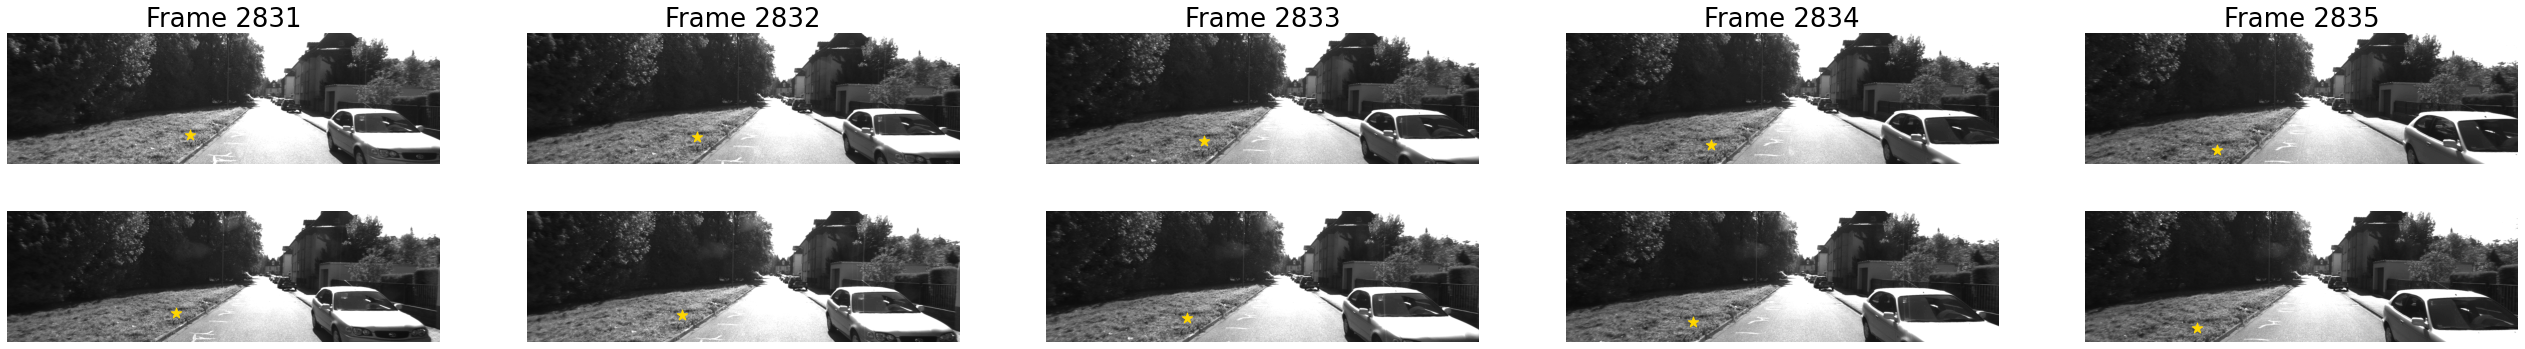

In [32]:
plt.clf()
fig, axes = plt.subplots(nrows=2, ncols=length, sharex='col', sharey='row')
fig.set_size_inches((9 * length, 6))

for i, fr_idx in enumerate(frame_idxs):
    xl, xr, y = db._tracks_db.xs(key=(fr_idx, trk_idx))
    img_l, img_r = read_images(fr_idx)
    ax_l, ax_r = axes[0, i], axes[1, i]

    ax_l.imshow(img_l, cmap='gray', vmin=0, vmax=255)
    ax_l.scatter(xl, y, s=120, c="gold", marker='*')
    ax_l.axis('off')
    ax_l.set_title(f"Frame {fr_idx}", fontsize=26)

    ax_r.imshow(img_r, cmap='gray', vmin=0, vmax=255)
    ax_r.scatter(xr, y, s=120, c="gold", marker='*')
    ax_r.axis('off')

plt.show()